<font color="#399DA6"><h1>Feature Conditioning Method: Simple LDA & PCA-LDA</h1></font>

Importing all the required libraries:

    "Load_data": extracts all the features from dataset
    
    "LDA": Linear Discriminant Analysis library

In [35]:
import sys
import numpy as np
import pandas as pd
sys.path.insert(0, '../Libraries')
sys.path.insert(0, '../Datas/')

from Load_data import *
from LDA import *
from PCA import *

Using *loaddata()*, all the features from dataset are extracted and stored in a data frame.

The 591 Dataset includes all the spectral and rhythm features.

Some of these features are selected to form the data frame.

Then features and labels are divided.

In [36]:
dataset='591'
df=loaddata(features=["fourier_tempogram"], 
            adr1=f'../Datas/X_{dataset}.pickle',
            adr2=f'../Datas/label_instrument_{dataset}.pickle',
            adr3=f'../Datas/label_dastgah_{dataset}.pickle')
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
feature_vectors=df.drop(["dastgah", "instrument"],axis=1)
y=df["dastgah"]

Choosig to use the PCA, LDA, or Both together.
Note that setting both of them at "False" will esult in simple cross validation.

In [37]:

PCA_var = False
LDA_var = True

Using "train_test_split" library, the dataframe is split into test and train sections. test size is 30 percent.
Preprocessing on feature sets:

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(feature_vectors,y,test_size=0.3,random_state=0)

from preprocess import *
X_train,X_test = preprocess(X_train,X_test)


Utilizing the PCA library, if selected, feature conditioning is performed and only the selected features are stored in *X_train* and *X_test* data frame.

In [39]:
if(PCA_var):
    Pca=pca(X_train)
    X_train=Pca.PCAout(50)
    X_test=Pca.PCA_changeX(X_test)

The selected features are shown:

In [40]:
X_train.describe()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature376,feature377,feature378,feature379,feature380,feature381,feature382,feature383,feature384,feature385
count,4.840000e+02,484.0,4.840000e+02,4.840000e+02,4.840000e+02,4.840000e+02,4.840000e+02,4.840000e+02,4.840000e+02,4.840000e+02,...,4.840000e+02,4.840000e+02,4.840000e+02,4.840000e+02,4.840000e+02,4.840000e+02,484.000000,4.840000e+02,4.840000e+02,484.0
mean,-2.275498e-16,0.0,-2.789321e-16,-2.202095e-17,-9.175397e-18,-7.340318e-18,-1.835079e-17,5.505238e-18,-9.175397e-18,5.321730e-17,...,4.037175e-17,-7.340318e-18,-3.486651e-17,-7.340318e-18,1.468064e-17,3.303143e-17,0.000000,2.936127e-17,1.835079e-17,0.0
std,1.001035e+00,0.0,1.001035e+00,1.001035e+00,1.001035e+00,1.001035e+00,1.001035e+00,1.001035e+00,1.001035e+00,1.001035e+00,...,1.001035e+00,1.001035e+00,1.001035e+00,1.001035e+00,1.001035e+00,1.001035e+00,1.001035,1.001035e+00,1.001035e+00,0.0
min,-2.901135e+00,0.0,-4.038092e+00,-5.677914e+00,-3.204224e+00,-3.951324e+00,-5.099087e+00,-2.958033e+00,-3.735889e+00,-3.738785e+00,...,-2.783700e+00,-5.325672e+00,-3.693633e+00,-4.096557e+00,-3.897209e+00,-6.273815e+00,-4.521058,-3.817302e+00,-3.971830e+00,0.0
25%,-7.019505e-01,0.0,-6.792745e-01,-4.006924e-01,-4.909248e-01,-4.163668e-01,-4.350055e-01,-5.448316e-01,-5.284181e-01,-5.285887e-01,...,-5.123343e-01,-5.070644e-01,-5.227481e-01,-5.739289e-01,-5.448523e-01,-4.724431e-01,-0.528044,-5.482693e-01,-6.409707e-01,0.0
50%,-5.605325e-03,0.0,5.939904e-03,1.484399e-02,-3.386138e-02,2.743514e-02,3.359606e-02,-3.417433e-02,2.282867e-03,-4.396749e-03,...,1.903648e-02,5.271227e-02,-1.366059e-03,-7.763701e-02,1.132111e-02,3.926116e-02,-0.042612,-3.816815e-02,3.243659e-02,0.0
75%,6.778916e-01,0.0,7.024091e-01,4.502671e-01,4.483777e-01,4.237108e-01,5.951080e-01,4.893744e-01,4.571554e-01,5.818859e-01,...,4.559686e-01,5.322104e-01,5.161490e-01,5.051200e-01,5.614874e-01,4.799529e-01,0.501277,5.207065e-01,6.107123e-01,0.0
max,4.037945e+00,0.0,2.902483e+00,4.683424e+00,5.391526e+00,3.955279e+00,3.204951e+00,5.400645e+00,4.393964e+00,3.707750e+00,...,5.587174e+00,4.036501e+00,4.148970e+00,5.352480e+00,4.615243e+00,3.519005e+00,4.123985,4.693938e+00,3.897799e+00,0.0


Classifiers KNN, SVM, MLP, Logistic, Adaboost, and XGBoost are used

<font color="#61C29E"><h1>1) KNN</h2></font>
After classification, accuracy and confusion matrix are reported.

In [41]:
Accuracies = [["KNN",0], ["SVM",0], ["MLP",0], ["Logistic",0], ["Adaboost",0], ["XGBoost",0]]

The best accuracy is 18.97 % with k = 22
Cross-Validation Results:  [0.2268041237113402, 0.1958762886597938, 0.17525773195876287, 0.18556701030927836, 0.16494845360824742]
min validation accuracy is 16.49 % with k = 22
mean validation accuracy is 18.97 % with k = 22
max validation accuracy is 22.68 % with k = 22


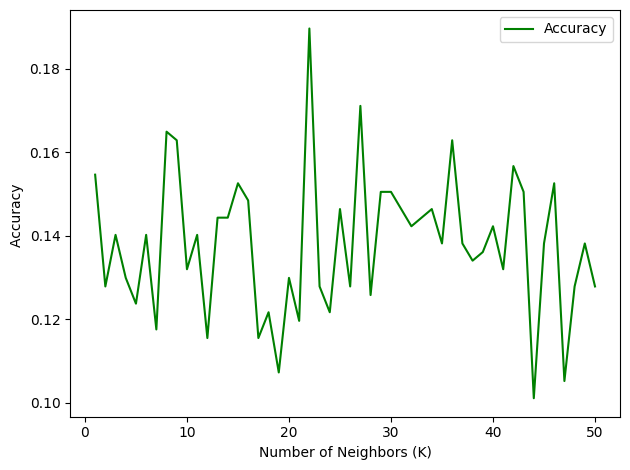

====> Test accuracy is 16.83 % with k = 22


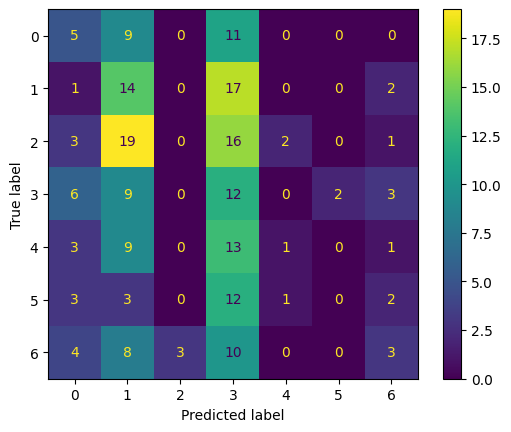

In [42]:
from KNN import *
Knn=KNN(X_train,y_train,X_test,y_test)
Knn.plot(50, LDA_in = LDA_var)
Accuracies[0][1] = Knn.acc

<font color="#61C29E"><h1>2) SVM</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.13402061855670103, 0.14432989690721648, 0.12371134020618557, 0.08247422680412371, 0.09278350515463918]
min validation accuracy is 8.25
mean validation accuracy is 11.55
max validation accuracy is 14.43
====> Test accuracy is 12.02


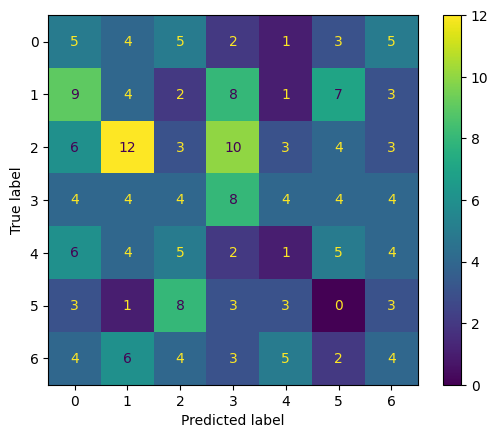

              precision    recall  f1-score   support

         0.0       0.14      0.20      0.16        25
         1.0       0.11      0.12      0.12        34
         2.0       0.10      0.07      0.08        41
         3.0       0.22      0.25      0.24        32
         4.0       0.06      0.04      0.04        27
         5.0       0.00      0.00      0.00        21
         6.0       0.15      0.14      0.15        28

    accuracy                           0.12       208
   macro avg       0.11      0.12      0.11       208
weighted avg       0.12      0.12      0.12       208



In [43]:
from SVM import *
svm=SVM(X_train,y_train,X_test,y_test)
svm.accurate(LDA_in=LDA_var)
Accuracies[1][1] = svm.acc

<font color="#61C29E"><h1>3) MLP</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.07216494845360824, 0.14432989690721648, 0.10309278350515463, 0.10309278350515463, 0.17525773195876287]
min validation accuracy is 7.22
mean validation accuracy is 11.96
max validation accuracy is 17.53
====> Test accuracy is 12.02


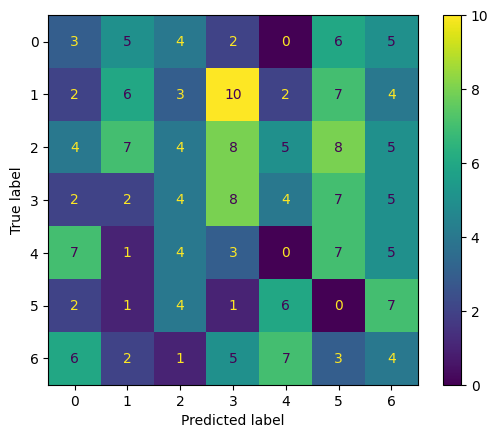

              precision    recall  f1-score   support

         0.0       0.12      0.12      0.12        25
         1.0       0.25      0.18      0.21        34
         2.0       0.17      0.10      0.12        41
         3.0       0.22      0.25      0.23        32
         4.0       0.00      0.00      0.00        27
         5.0       0.00      0.00      0.00        21
         6.0       0.11      0.14      0.13        28

    accuracy                           0.12       208
   macro avg       0.12      0.11      0.12       208
weighted avg       0.14      0.12      0.12       208



In [44]:
from mlp import *
mlp=MLP(X_train,y_train,X_test,y_test)
mlp.accurate(LDA_in=LDA_var)
Accuracies[2][1] = mlp.acc

<font color="#61C29E"><h1>4) Logistic</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.10309278350515463, 0.14432989690721648, 0.14432989690721648, 0.16494845360824742, 0.13402061855670103]
min validation accuracy is 10.31
mean validation accuracy is 13.81
max validation accuracy is 16.49
====> Test accuracy is 14.42


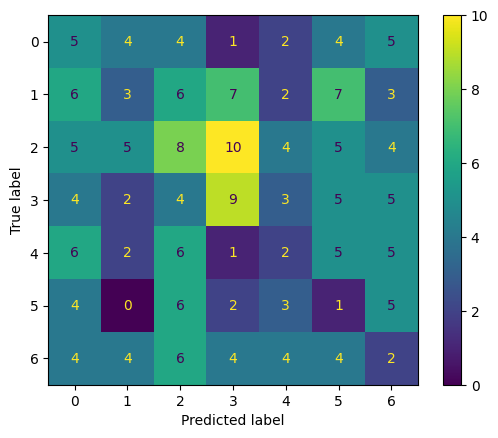

              precision    recall  f1-score   support

         0.0       0.15      0.20      0.17        25
         1.0       0.15      0.09      0.11        34
         2.0       0.20      0.20      0.20        41
         3.0       0.26      0.28      0.27        32
         4.0       0.10      0.07      0.09        27
         5.0       0.03      0.05      0.04        21
         6.0       0.07      0.07      0.07        28

    accuracy                           0.14       208
   macro avg       0.14      0.14      0.13       208
weighted avg       0.15      0.14      0.14       208



In [45]:
from LogisticRegression import *
lr=LR(X_train,y_train,X_test,y_test)
lr.accurate(LDA_in=LDA_var)
Accuracies[3][1] = lr.acc

<font color="#61C29E"><h1>5) AdaBoost</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.17525773195876287, 0.13402061855670103, 0.15463917525773196, 0.12371134020618557, 0.14432989690721648]
min validation accuracy is 12.37
mean validation accuracy is 14.64
max validation accuracy is 17.53
====> Test accuracy is 15.38


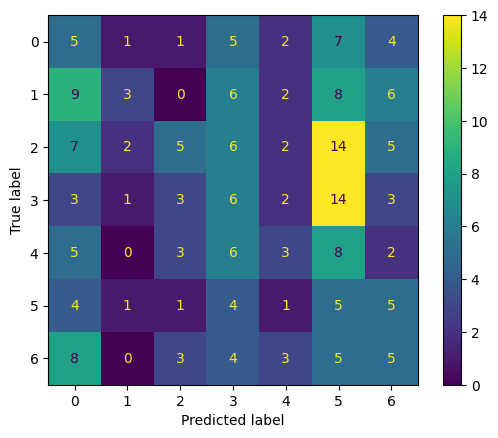

              precision    recall  f1-score   support

         0.0       0.12      0.20      0.15        25
         1.0       0.38      0.09      0.14        34
         2.0       0.31      0.12      0.18        41
         3.0       0.16      0.19      0.17        32
         4.0       0.20      0.11      0.14        27
         5.0       0.08      0.24      0.12        21
         6.0       0.17      0.18      0.17        28

    accuracy                           0.15       208
   macro avg       0.20      0.16      0.15       208
weighted avg       0.22      0.15      0.16       208



In [46]:
from adaboost import *
adaboost=ADABOOST(X_train,y_train,X_test,y_test)
adaboost.accurate(LDA_in=LDA_var)
Accuracies[4][1] = adaboost.acc

<font color="#61C29E"><h1>6) XGBoost</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.14432989690721648, 0.17525773195876287, 0.12371134020618557, 0.20618556701030927, 0.18556701030927836]
min validation accuracy is 12.37
mean validation accuracy is 16.7
max validation accuracy is 20.62
====> Test accuracy is 12.5


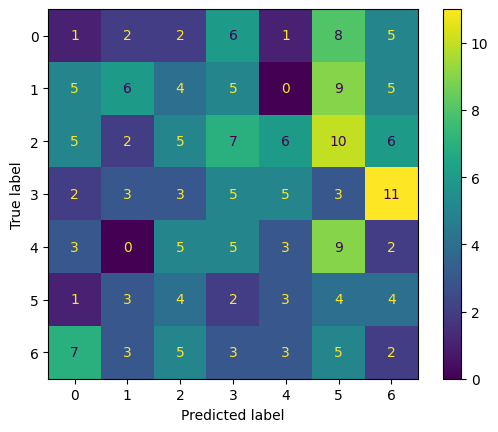

              precision    recall  f1-score   support

         0.0       0.04      0.04      0.04        25
         1.0       0.32      0.18      0.23        34
         2.0       0.18      0.12      0.14        41
         3.0       0.15      0.16      0.15        32
         4.0       0.14      0.11      0.12        27
         5.0       0.08      0.19      0.12        21
         6.0       0.06      0.07      0.06        28

    accuracy                           0.12       208
   macro avg       0.14      0.12      0.12       208
weighted avg       0.15      0.12      0.13       208



In [47]:
from XGBoost import *
xgboost=XGBoost(X_train,y_train,X_test,y_test)
xgboost.accurate(LDA_in=LDA_var)
Accuracies[5][1] = xgboost.acc

In [48]:
print(Accuracies)
temp = np.zeros((6,1))
for i in range(6):
    temp[i] = Accuracies[i][1]
for j in range(6):
    if Accuracies[j][1] == np.max(temp):
        print(Accuracies[j])

[['KNN', 0.16826923076923078], ['SVM', 0.1201923076923077], ['MLP', 0.1201923076923077], ['Logistic', 0.14423076923076922], ['Adaboost', 0.15384615384615385], ['XGBoost', 0.125]]
['KNN', 0.16826923076923078]


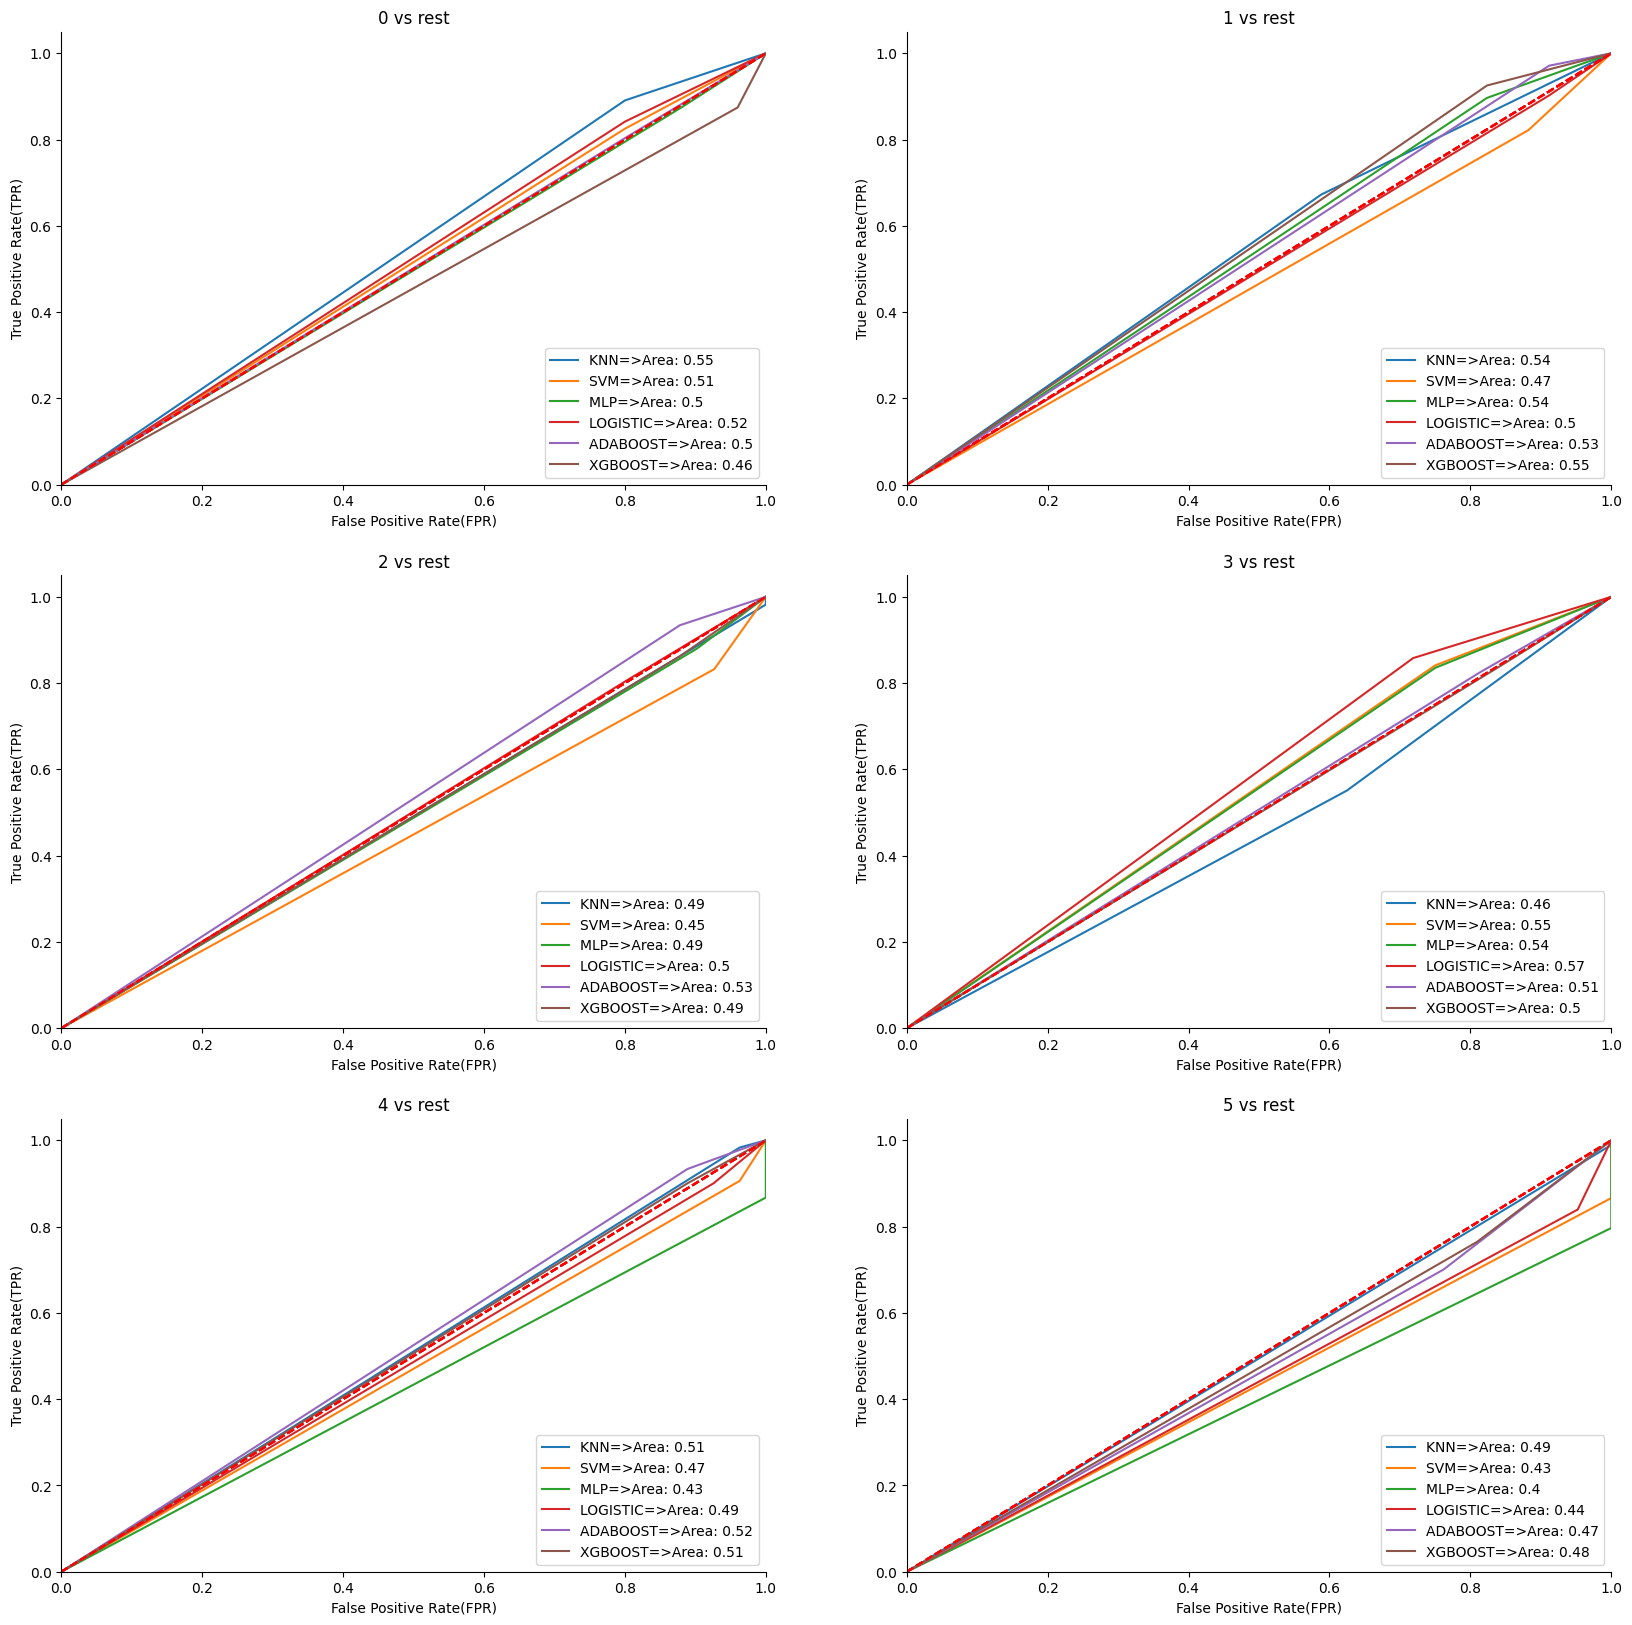

In [49]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report



## ROC Plotting function
def plot_roc(Y_test, ypr,axs,ll,x):   
    logit_roc_auc = roc_auc_score(Y_test, ypr,multi_class='ovr')
    fpr, tpr, _ = roc_curve(Y_test, ypr)
    axs.spines['right'].set_visible(False)
    axs.spines['top'  ].set_visible(False)
    axs.plot(fpr, tpr, label=ll+'=>Area: '+str(round(logit_roc_auc,2)))
    # axs.text(0.2,.6,'Area = %0.2f' % logit_roc_auc,size=15)
    axs.plot([0, 1], [0, 1],'r--')
    axs.set_xlim([0.0, 1.0])
    axs.set_ylim([0.0, 1.05])
    axs.set_xlabel('False Positive Rate(FPR)')
    axs.set_ylabel('True Positive Rate(TPR)')
    axs.set_title(f'{x} vs rest')
    axs.legend(loc="lower right")

_,axs = plt.subplots(3,2,figsize=(20,20))
for x in range(6):
    y0=[list(y_test),list(y_test),list(y_test),list(y_test),list(y_test),list(y_test)]
    yt0=[list(Knn.yhat),list(svm.yhat),list(mlp.yhat),list(lr.yhat),list(adaboost.yhat),list(xgboost.yhat)]
    for k in range(len(yt0)):
        for i in range(len(yt0[k])):
            if(y0[k][i]!=x):
                y0[k][i]=1
            else:
                y0[k][i]=0
            if(yt0[k][i]!=x):
                yt0[k][i]=1
            else:
                yt0[k][i]=0
    plot_roc(y0[0],yt0[0],axs[(x>=4)*1+(x>=2)*1+0][x%2],'KNN',x)
    plot_roc(y0[1],yt0[1],axs[(x>=4)*1+(x>=2)*1+0][x%2],'SVM',x)
    plot_roc(y0[2],yt0[2],axs[(x>=4)*1+(x>=2)*1+0][x%2],'MLP',x)
    plot_roc(y0[3],yt0[3],axs[(x>=4)*1+(x>=2)*1+0][x%2],'LOGISTIC',x)
    plot_roc(y0[4],yt0[4],axs[(x>=4)*1+(x>=2)*1+0][x%2],'ADABOOST',x)
    plot_roc(y0[5],yt0[5],axs[(x>=4)*1+(x>=2)*1+0][x%2],'XGBOOST',x)

plt.show()

In [50]:
from sklearn import metrics


yt0=[list(Knn.yhat),list(svm.yhat),list(mlp.yhat),list(lr.yhat),list(adaboost.yhat),list(xgboost.yhat)]
ymod=[]
for i in range(len(list(Knn.yhat))):
    lst=[yt0[k][i] for k in range(len(yt0))]
    ymod.append(max(lst,key=lst.count))
    
metrics.accuracy_score(y_test.values.ravel(), ymod)

0.11057692307692307